# Stim x Stim Similarity Matrix


In [1]:
import numpy as np
import pandas as pd
from scipy.stats import stats
from sklearn.linear_model import LinearRegression
import random
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats

## Load Z-scored VE Data

In [8]:
src = '/Users/pmahableshwarkar/Documents/Depth_Project/verbal_judgement_analysis/TAC_data/matched_VE_data/zscored_data.csv'

zscored_data = pd.read_csv(src)  


In [9]:
zscored_250 = zscored_data.loc[zscored_data["duration"]  == 250]
zscored_1000 = zscored_data.loc[zscored_data["duration"]  == 1000]

In [15]:
zscored_duration_data = [zscored_250, zscored_1000]


In [27]:
stimuli = zscored_data.stimulus.unique()
x = stimuli[0]
x

'depth_duration_stimuli/003621_2014-05-23_18-06-08_094959634447_rgbf000101-resize_1/003621_2014-05-23_18-06-08_094959634447_rgbf000101-resize_1-target.png'

In [89]:
data_complete = {}
data_complete_250 = {}
data_complete_1000 = {}

i = 0
for stimulus in stimuli:
    # estimates at 250 ms
    stim_df_250 = zscored_250[zscored_250['stimulus'] == stimulus]
    stim_estims_250 = list(stim_df_250['depth_estimate'])
    
    data_complete['S' + str(i) + '_250'] = stim_estims_250
    
    i += 1
    
i = 0
for stimulus in stimuli:
    # estimates at 1000 ms
    stim_df_1000 = zscored_1000[zscored_1000['stimulus'] == stimulus]
    stim_estims_1000 = list(stim_df_1000['depth_estimate'])
    
    data_complete['S' + str(i) + '_1000'] = stim_estims_1000
    
    i += 1
    
i = 0
for stimulus in stimuli:
    # estimates at 250 ms
    stim_df_250 = zscored_250[zscored_250['stimulus'] == stimulus]
    stim_estims_250 = list(stim_df_250['depth_estimate'])
    # estimates at 1000 ms
    stim_df_1000 = zscored_1000[zscored_1000['stimulus'] == stimulus]
    stim_estims_1000 = list(stim_df_1000['depth_estimate'])
    data_complete_250['S' + str(i) + '_250'] = stim_estims_250
    data_complete_1000['S' + str(i) + '_1000'] = stim_estims_1000
    
    i += 1

In [86]:
len(data_complete_250)

192

In [60]:
# due to outlier cleaning, each stimulus does not have an even number of depth estimates
# need to find the minimum number of estimates available across all durations and stimuli
num_estimates_per_stimulus = []
for key in data_complete:
    num_estimates_per_stimulus.append(len(data_complete[key]))

min(num_estimates_per_stimulus)

44

In [95]:
# randomly sample the minimum of the number of estimates available per stimulus

data_truncated = {}
data_truncated_250 = {}
data_truncated_1000 = {}

for key in data_complete:
    data_truncated[key] = random.sample(data_complete[key], min(num_estimates_per_stimulus))
    
for key in data_complete_250:
    data_truncated_250[key] = random.sample(data_complete_250[key], min(num_estimates_per_stimulus))

for key in data_complete_1000:
    data_truncated_1000[key] = random.sample(data_complete_1000[key], min(num_estimates_per_stimulus))

In [80]:
df = pd.DataFrame(data_truncated)
matrix = df.corr()

df_250 = pd.DataFrame(data_truncated_250)
matrix_250 = df_250.corr()

df_1000 = pd.DataFrame(data_truncated_1000)
matrix_1000 = df_1000.corr()

In [99]:
# df

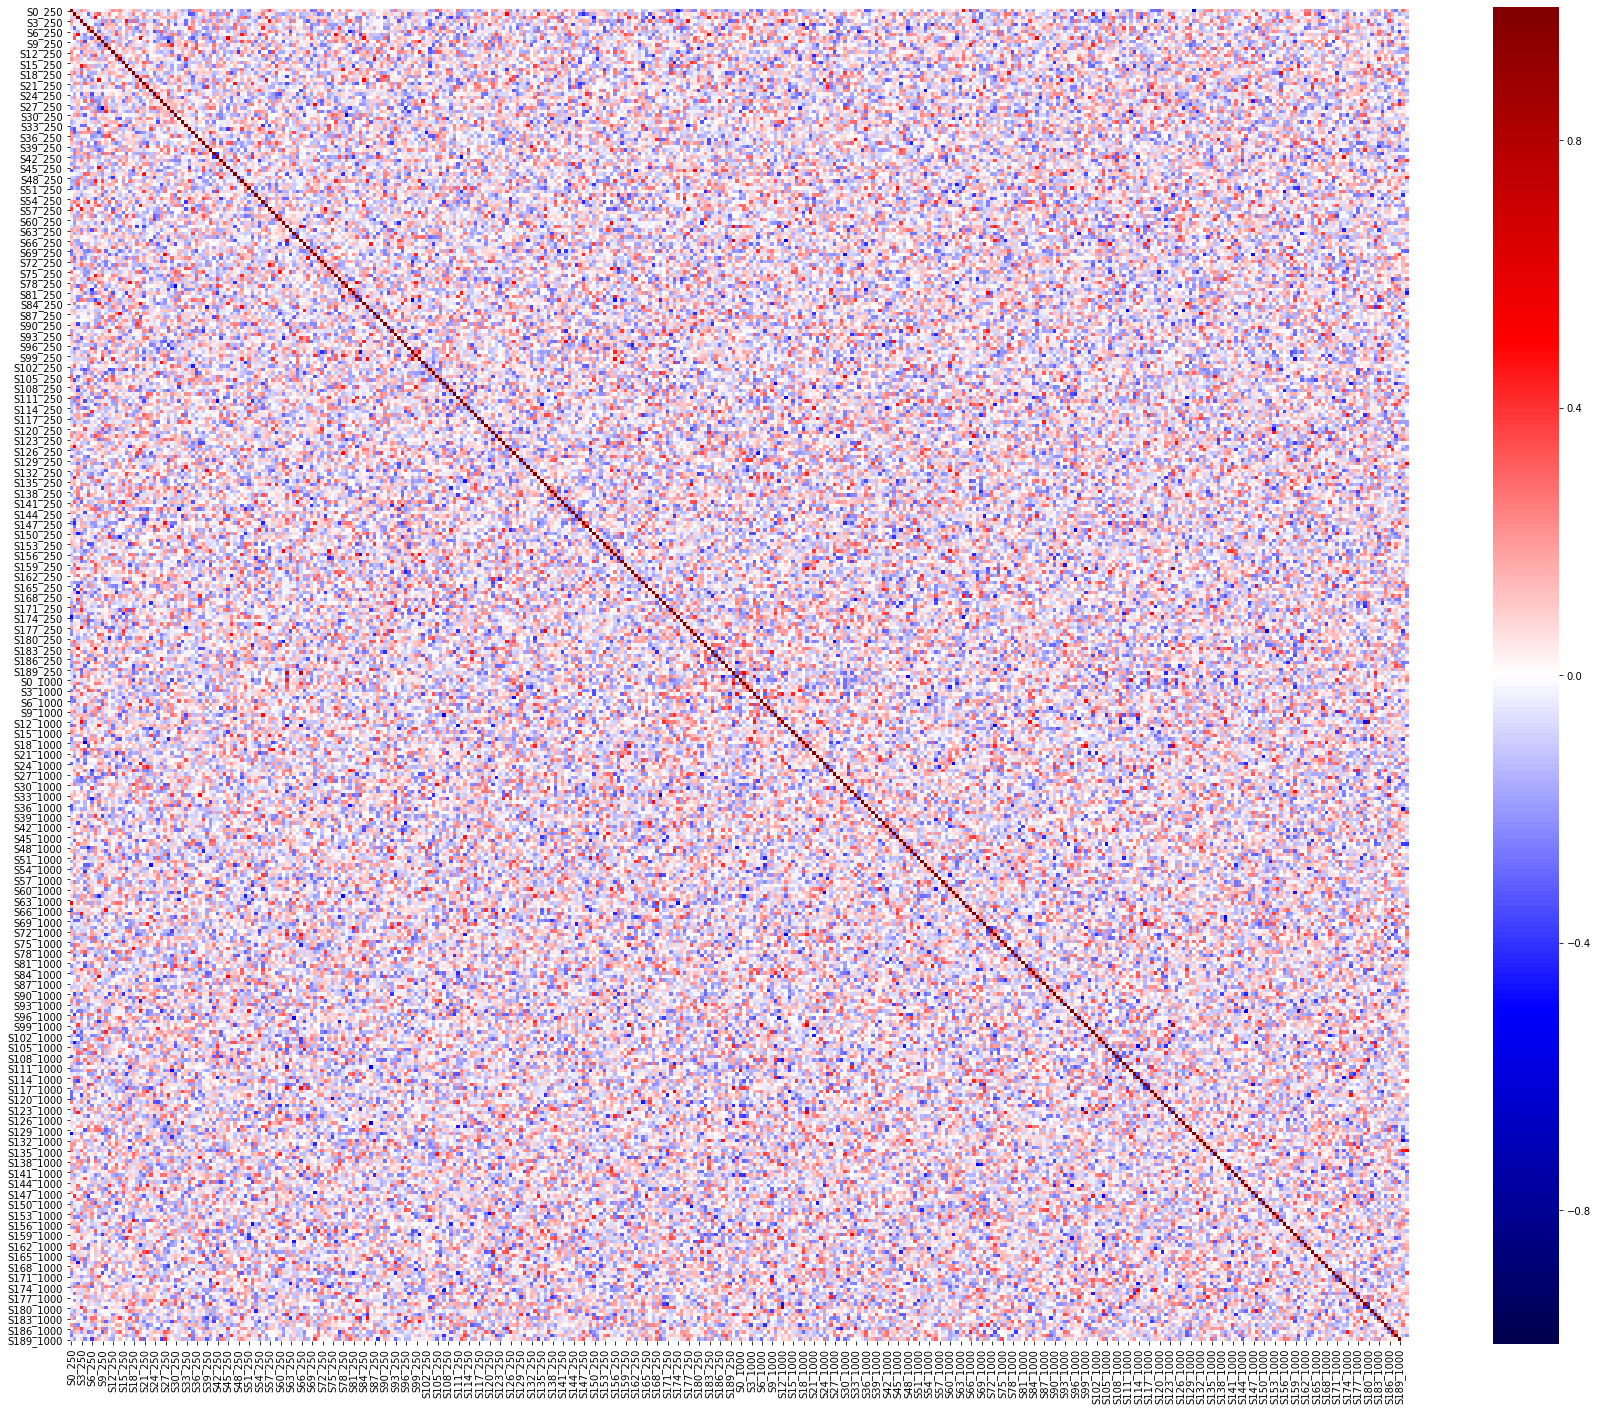

In [101]:
plt.figure(figsize=[30,30])

ax = sns.heatmap(matrix, annot=False, fmt=".2f", annot_kws={"fontsize":2}, cmap= "seismic", square=True, center=0, vmin=-1, vmax=1, edgecolors='w', linewidths=0, cbar_kws={"shrink": .82}) #notation: "annot" not "annote"
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

# plt.title('Log Centered RT', fontsize=15)

plt.savefig('/Users/pmahableshwarkar/Documents/Depth_Project/verbal_judgement_analysis/TAC_data/matched_VE_data/stim_matrix.png');

In [54]:
len(data_truncated)

384

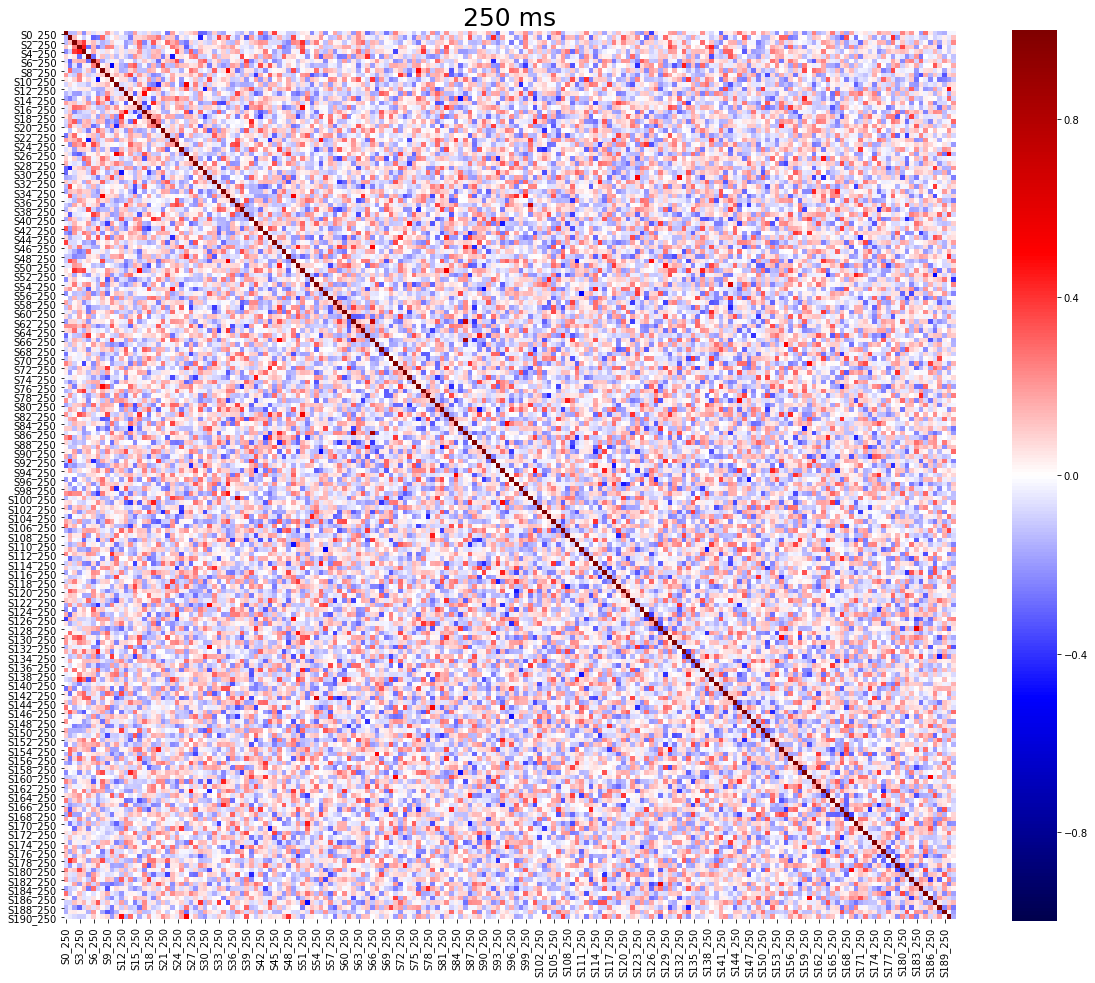

In [73]:
plt.figure(figsize=[20,20])

ax = sns.heatmap(matrix_250, annot=False, fmt=".2f", annot_kws={"fontsize":10}, cmap= "seismic", square=True, center=0, vmin=-1, vmax=1, edgecolors='w', linewidths=0, cbar_kws={"shrink": .82}) #notation: "annot" not "annote"
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

plt.title('250 ms', fontsize=25)

# plt.savefig('/Users/pmahableshwarkar/Documents/Depth_Project/verbal_judgement_analysis/TAC_data/matched_VE_data/stim_matrix.png');

plt.show();


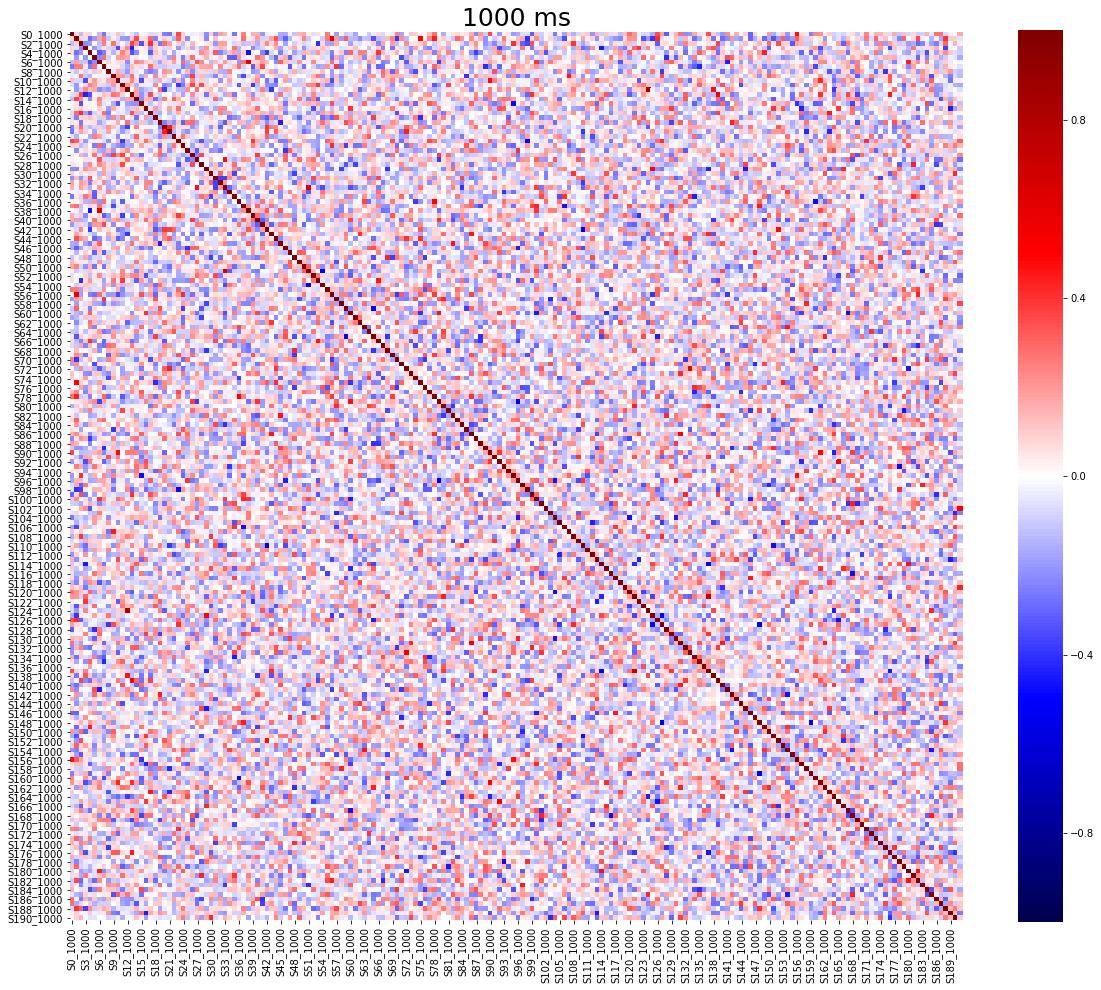

In [74]:
plt.figure(figsize=[20,20])

ax = sns.heatmap(matrix_1000, annot=False, fmt=".2f", annot_kws={"fontsize":10}, cmap= "seismic", square=True, center=0, vmin=-1, vmax=1, edgecolors='w', linewidths=0, cbar_kws={"shrink": .82}) #notation: "annot" not "annote"
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

plt.title('1000 ms', fontsize=25)

# plt.savefig('/Users/pmahableshwarkar/Documents/Depth_Project/verbal_judgement_analysis/TAC_data/matched_VE_data/stim_matrix.png');

plt.show();


In [113]:
zscored_range = [zscored_data.loc[(zscored_data['actual_depth'] < 2)],
                 zscored_data.loc[(zscored_data['actual_depth'] >= 2) & (zscored_data['actual_depth'] < 3)],
                 zscored_data.loc[(zscored_data['actual_depth'] >= 3) & (zscored_data['actual_depth'] < 4)],
                 zscored_data.loc[(zscored_data['actual_depth'] >= 4)]]

zscored_range_250 = []

zscored_range_1000 = []

for df in zscored_range:
    